## Install modules to environment

In [1]:
%pip install pandas numpy requests seaborn matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import modules

In [2]:
from Backtesting.dataFetchers.marketDataFetchers import CoinbaseFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import CryptoQuantFetcherWithoutExchange
from Backtesting.strategies.flowSignalStrategy import FlowSignalStrategy

from Backtesting.backtest import Backtest

from datetime import datetime



## Fetch Data

Input API key and desired interval and window

In [3]:
API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"


### Market Data

In [4]:
MARKET_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/coinbase/candle"


In [5]:
# start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# end_time = int(datetime(2024, 12, 31, 23, 59).timestamp() * 1000)

bt_start_time = int(datetime(2021, 1, 1).timestamp() * 1000)
bt_end_time = int(datetime(2023, 12, 31, 23, 59).timestamp() * 1000)

ft_start_time = int(datetime(2024, 1, 1).timestamp() * 1000)
ft_end_time = int(datetime(2024, 12, 28, 23, 59).timestamp() * 1000)

# bt_start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# bt_end_time = int(datetime(2023, 2, 1, 23, 59).timestamp() * 1000)

# ft_start_time = int(datetime(2024, 1, 1).timestamp() * 1000)
# ft_end_time = int(datetime(2024, 2, 1, 23, 59).timestamp() * 1000)


### On Chain Metrics Data 

In [6]:
ONCHAIN_API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
ONCHAIN_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/cryptoquant"
GLASSNODE_BASE_URL = "https://api.datasource.cybotrade.rs/glassnode"
EXCHANGE = "binance" # Can be any exchange available on CryptoQuant
CURRENCY = "btc" # Can be any symbol available on CryptoQuant
ASSET = "BTC"
ON_CHAIN_LIMIT = None # Number of data points to fetch

ohlcv_window = "day"
ohlcv_endpoint_category = "market-data"
ohlcv_metric = "price-ohlcv"

netflow_window = "day"
netflow_endpoint_category = "exchange-flows"
netflow_metric = "netflow"

exchange_whale_ratio_window = "day"
exchange_whale_ratio_endpoint_category = "flow-indicator"
exchange_whale_ratio_metric = "exchange-whale-ratio"

funding_rates_window = "day"
funding_rates_endpoint_category = "market-data"
funding_rates_metric = "funding-rates"

dormancy_window = "day"
dormancy_endpoint_category = "network-indicator"
dormancy_metric = "dormancy"



In [7]:
def fetch_on_chain_datas(start_time, end_time, file_name):

    on_chain_fetcher_ohlcv = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, ohlcv_endpoint_category, ohlcv_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_ohlcv.fetch_ohlcv(ohlcv_window, start_time, end_time)

    on_chain_fetcher_netflow = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, netflow_endpoint_category, netflow_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_netflow.fetch_netflow(netflow_window, start_time, end_time)

    on_chain_fetecher_exchange_whale_ratio = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, exchange_whale_ratio_endpoint_category, exchange_whale_ratio_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetecher_exchange_whale_ratio.fetch_exchange_whale_ratio(exchange_whale_ratio_window, start_time, end_time)

    on_chain_fetcher_funding_rates = CryptoQuantFetcher(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, funding_rates_endpoint_category, funding_rates_metric, EXCHANGE, ON_CHAIN_LIMIT)
    on_chain_fetcher_funding_rates.fetch_funding_rates(funding_rates_window, start_time, end_time)

    on_chain_fetcher_without_exchange_dormancy = CryptoQuantFetcherWithoutExchange(API_KEY, ONCHAIN_DATA_BASE_URL, CURRENCY, dormancy_endpoint_category, dormancy_metric, ON_CHAIN_LIMIT)
    on_chain_fetcher_without_exchange_dormancy.fetch_dormancy(dormancy_window, start_time, end_time)

    print("📁 Ohlcv path:", on_chain_fetcher_ohlcv.saved_filepath)
    print("📁 Netflow path:", on_chain_fetcher_netflow.saved_filepath)
    print("📁 Whale Ratio path:", on_chain_fetecher_exchange_whale_ratio.saved_filepath)
    print("📁 Funding Rates path:", on_chain_fetcher_funding_rates.saved_filepath)
    print("📁 Dormancy path:", on_chain_fetcher_without_exchange_dormancy.saved_filepath)

    csvs_to_merge = [
    on_chain_fetcher_ohlcv.saved_filepath,
    on_chain_fetcher_netflow.saved_filepath,
    on_chain_fetecher_exchange_whale_ratio.saved_filepath,
    on_chain_fetcher_funding_rates.saved_filepath,
    on_chain_fetcher_without_exchange_dormancy.saved_filepath
    ]

    CryptoQuantFetcher.merge_selected_csv_files(csvs_to_merge, file_name) 




### Fetch hmm model data

In [8]:
backtest_dataset_file_path = "datasets/backtest_data.csv"
forwardtest_dataset_file_path = "datasets/forwardtest_data.csv"

# fetch_on_chain_datas(bt_start_time, bt_end_time, backtest_dataset_file_path)
# fetch_on_chain_datas(ft_start_time, ft_end_time, forwardtest_dataset_file_path)

## Instantiate Strategy

      timestamp      open      high       low     close         volume  \
1    2021-01-02  29331.70  33300.00  28946.53  32178.33  129993.873362   
2    2021-01-03  32176.45  34778.11  31962.99  33000.05  120957.566750   
3    2021-01-04  33000.05  33600.00  28130.00  31988.71  140899.885690   
4    2021-01-05  31989.75  34360.00  29900.00  33949.53  116049.997038   
5    2021-01-06  33949.53  36939.21  33288.00  36769.36  127139.201310   
...         ...       ...       ...       ...       ...            ...   
1090 2023-12-27  42508.93  43677.00  42098.69  43428.85   36191.211360   
1091 2023-12-28  43428.86  43787.57  42241.79  42563.76   35150.524850   
1092 2023-12-29  42563.76  43111.00  41300.00  42066.95   42597.189120   
1093 2023-12-30  42066.94  42612.32  41520.30  42140.28   22906.578180   
1094 2023-12-31  42140.29  42899.00  41965.84  42283.58   23585.916030   

      netflow_total  exchange_whale_ratio  funding_rates  average_dormancy  \
1        921.517693              

         1   -8411.81672963             +nan
         2   -7213.26915269   +1198.54757694
         3   -7120.66836145     +92.60079124
         4   -7089.04023480     +31.62812664
         5   -7073.27504217     +15.76519263
         6   -7063.49384927      +9.78119291
         7   -7054.08531846      +9.40853081
         8   -7041.51451983     +12.57079863
         9   -7024.43527148     +17.07924835
        10   -7001.06649853     +23.36877295
        11   -6979.24384399     +21.82265454
        12   -6964.87953820     +14.36430579
        13   -6956.70204373      +8.17749447
        14   -6951.26987926      +5.43216446
        15   -6947.02635438      +4.24352488
        16   -6943.49039954      +3.53595484
        17   -6940.00550413      +3.48489540
        18   -6936.86891075      +3.13659339
        19   -6934.74511549      +2.12379526
        20   -6933.39851553      +1.34659996
        21   -6932.53820595      +0.86030958
        22   -6931.98057186      +0.55763409
        23

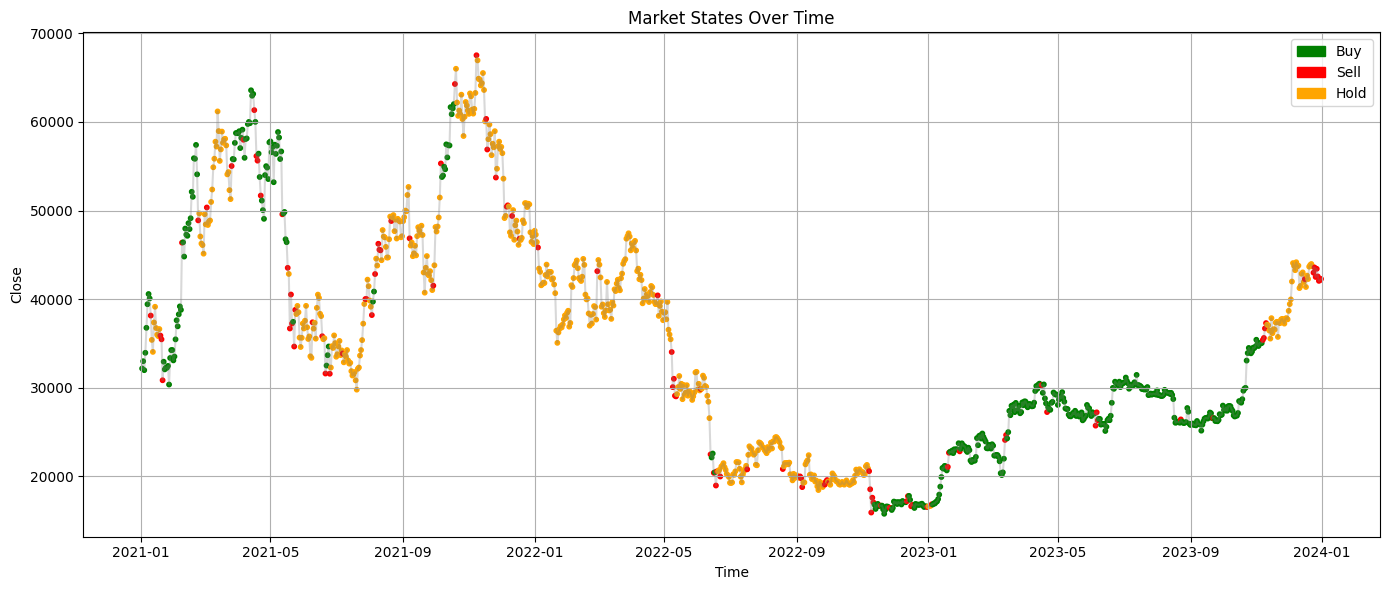

Converged: True
Final log likelihood: -6909.551054997456
State Labels: {1: 'buy', 0: 'sell', 2: 'hold'}
      timestamp      open     close  netflow_total  exchange_whale_ratio  \
1    2021-01-02  29331.70  32178.33     921.517693              0.139729   
2    2021-01-03  32176.45  33000.05    5649.254693              0.184488   
3    2021-01-04  33000.05  31988.71   -2530.928551              0.137315   
4    2021-01-05  31989.75  33949.53   -3179.502747              0.148536   
5    2021-01-06  33949.53  36769.36   -5332.450146              0.168091   
...         ...       ...       ...            ...                   ...   
1090 2023-12-27  42508.93  43428.85   -4560.323842              0.461077   
1091 2023-12-28  43428.86  42563.76   -4583.994366              0.330835   
1092 2023-12-29  42563.76  42066.95   -5925.682344              0.345703   
1093 2023-12-30  42066.94  42140.28   15040.904774              0.147352   
1094 2023-12-31  42140.29  42283.58    7465.803908          

/Users/winnee/.pyenv/versions/3.11.9/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0386
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0035
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0029
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0025
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0022
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0019
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0018
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0017
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0016


In [9]:
mfs = FlowSignalStrategy(backtest_dataset_file_path, backtest_dataset_file_path)

In [10]:
bt = Backtest(mfs, 10, 0.006)

Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
Predict data filepath in DeepPredictorStrategy: datasets/backtest_data.csv
✅ Testing set shape: X=(1035, 60, 5), y=(1035, 1)
🕒 Predicting for 1035 hours ≈ 43.1 days
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Results from LSTM model:
      timestamp  actual_close  predicted_close
60   2021-03-02      48440.65     10762.492009
61   2021-03-03      50349.37     22109.786751
62   2021-03-04      48374.09      3221.236458
63   2021-03-05      48751.71     -1498.201464
64   2021-03-06      48882.20     -3977.052853
...         ...           ...              ...
1090 2023-12-27      43428.85     26946.302242
1091 2023-12-28      42563.76     33236.105204
1092 2023-12-29      42066.95     37168.738308
1093 2023-12-30      42140.28     39646.661348
1094 2023-12-31      42283.58      9794.787192

[1035 rows x 3 columns]


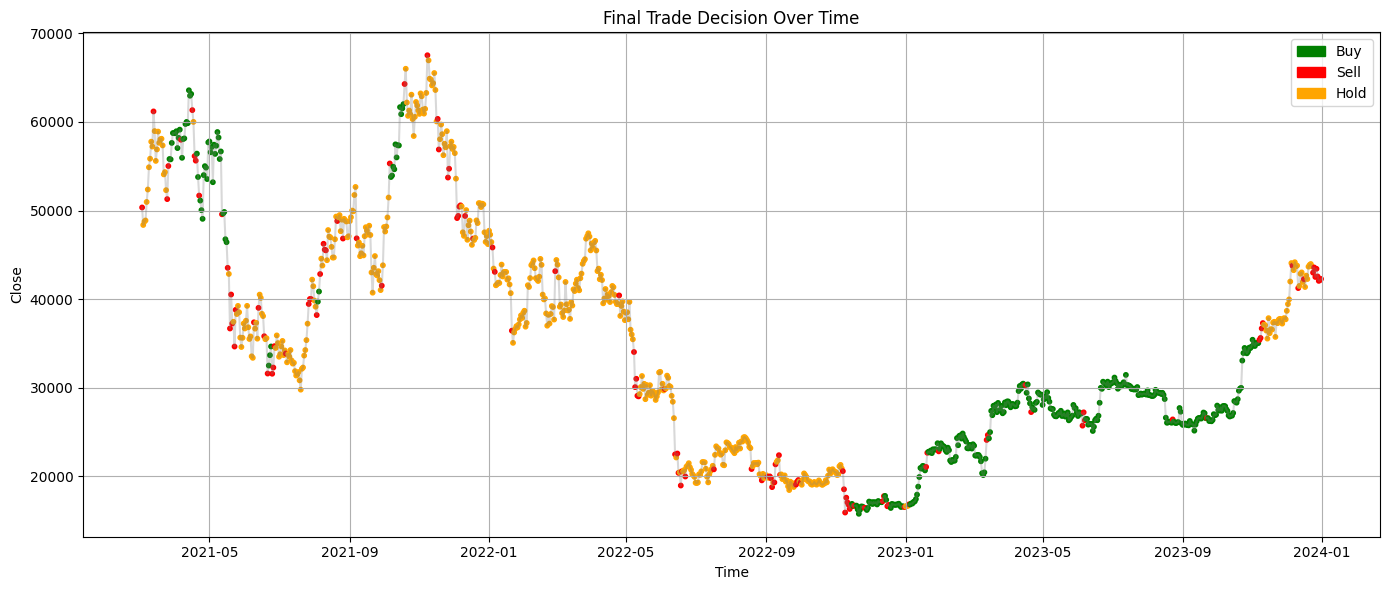

In [11]:
bt.run()

In [12]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")

Start Trade Date: 2021-03-03 00:00:00
End Trade Date: 2023-12-31 00:00:00
Number of Trades: 257
Sharpe Ratio: -1.148326
Max Drawdown (%): -2.72627
Trade per Interval: 0.248549
Trading Fees: 0.006


In [13]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv


In [14]:
# import numpy as np

# bt.run_backtest_heatmap(bullish_range=np.linspace(0.2, 0.8, 4), bearish_range=np.linspace(0.2, 0.8, 4), metric='Sharpe Ratio' )

In [15]:
# import pandas as pd

# test_df = pd.read_csv("backtest_trade_logs.csv")
# test_df["equity"].plot()



## Perform Forward Testing Using Best Threshold

### Set forward testing dataset

In [16]:
# bt.set_predict_filepath(forwardtest_dataset_file_path, forwardtest_dataset_file_path)

### Set best threshold

In [17]:
# bt.set_best_thresholds(bull_thres=0.4, bear_thres=0.4)

### Run testing using forward dataset

In [18]:
# bt.run()

In [19]:
# performance = bt.get_performance_results()

# for key, value in performance.items():
#     print(f"{key}: {value}")


In [20]:
# bt.get_trade_logs_csv()